In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

MSE误差: 0.04633260332576445


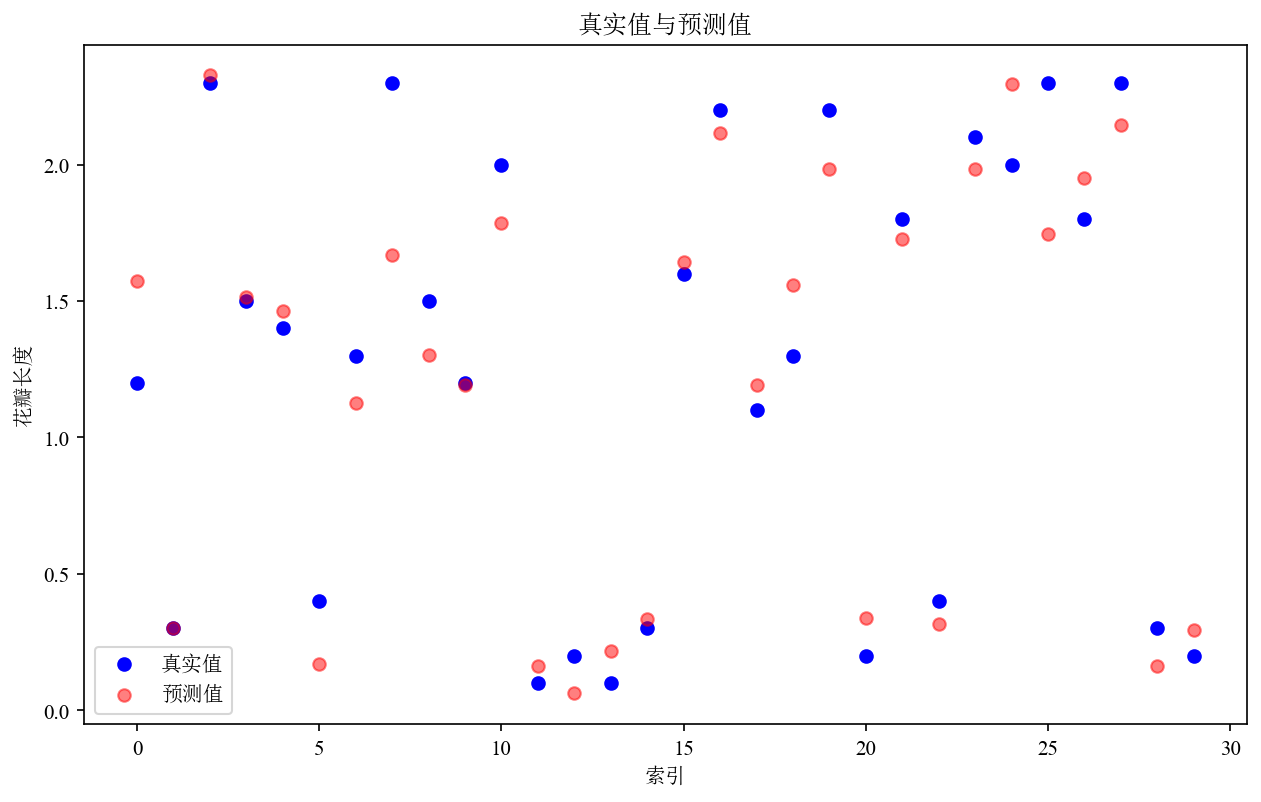

In [32]:
X = iris_dataset.data[:, :3]  # 使用前三个特征
y = iris_dataset.data[:, 3]   # 使用第四个特征作为目标
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse=np.mean((y_test-y_pred)**2)
# mse = mean_squared_error(y_test,y_pred)
print(f'MSE误差: {mse}')

plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('索引')
plt.ylabel('花瓣长度')
plt.title('真实值与预测值')
plt.show()


## KNN

MSE误差: 0.04401333333333334


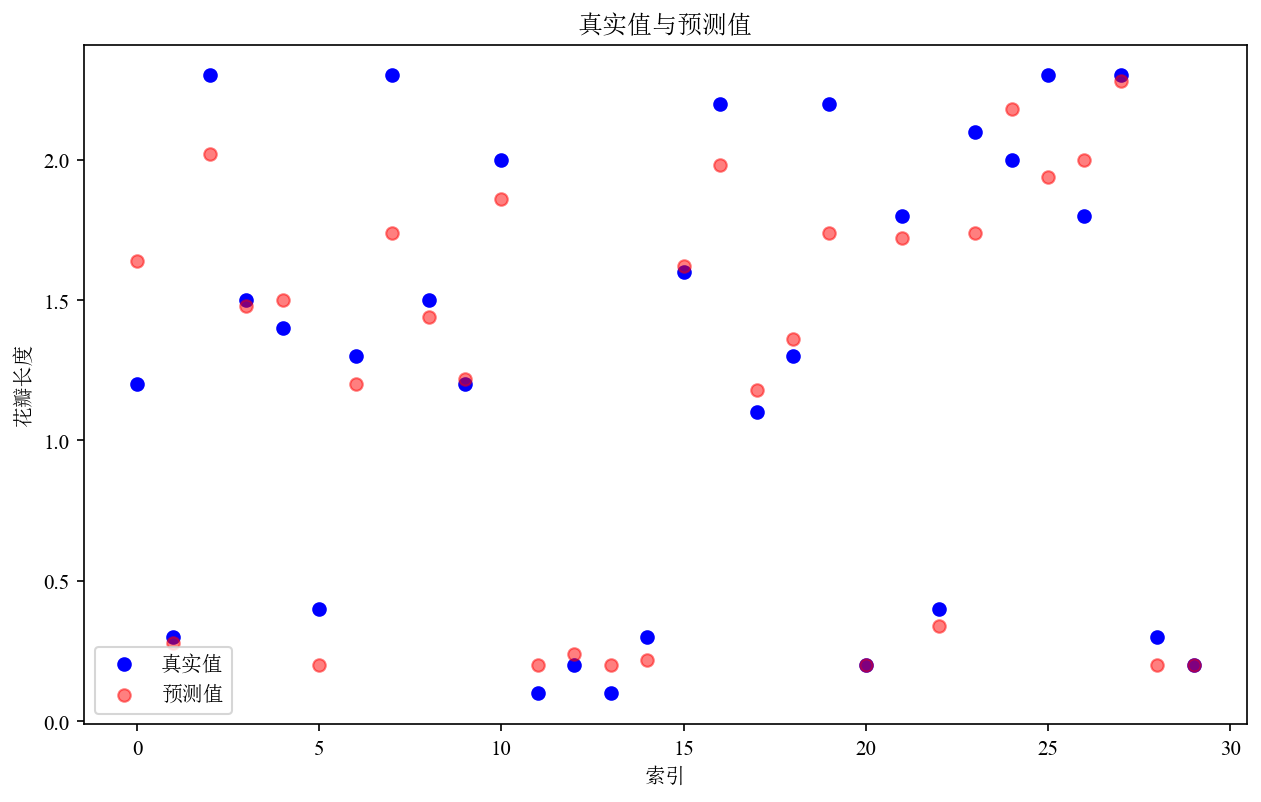

In [33]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # 选择k=5
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE误差: {mse}')

plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('索引')
plt.ylabel('花瓣长度')
plt.title('真实值与预测值')
plt.show()

## 使用PCA降维

MSE误差: 0.049


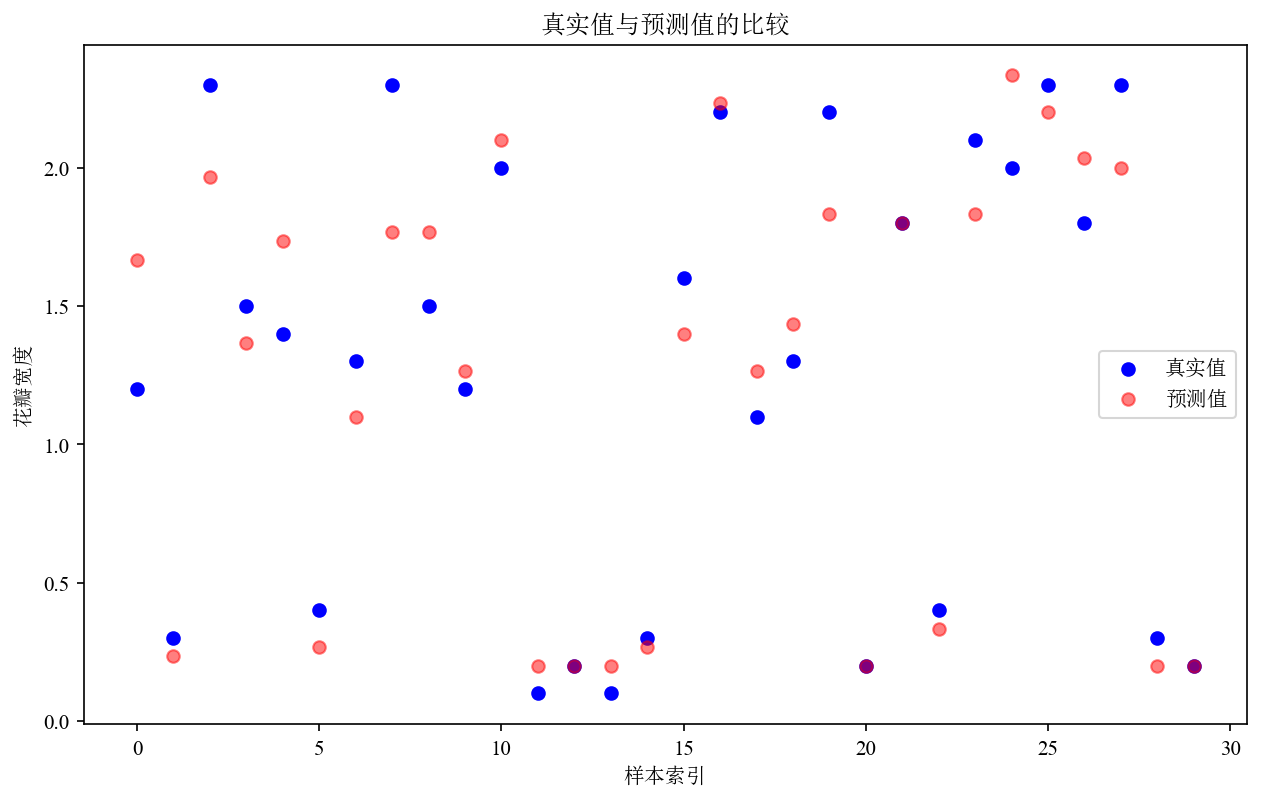

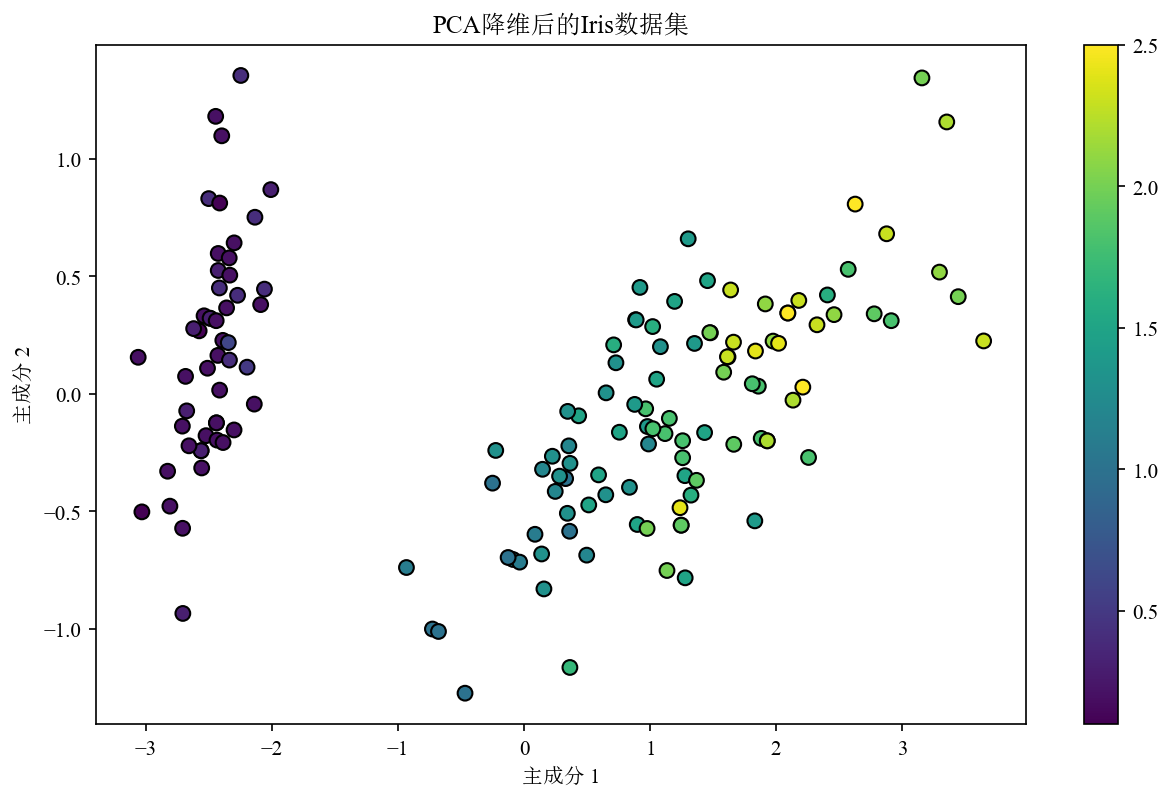

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE误差: {mse:.2}')

plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('样本索引')
plt.ylabel('花瓣宽度')
plt.title('真实值与预测值的比较')
plt.show()

plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.title('PCA降维后的Iris数据集')
plt.colorbar()
plt.show()

## XGBoost

MSE误差: 0.05177538160560268


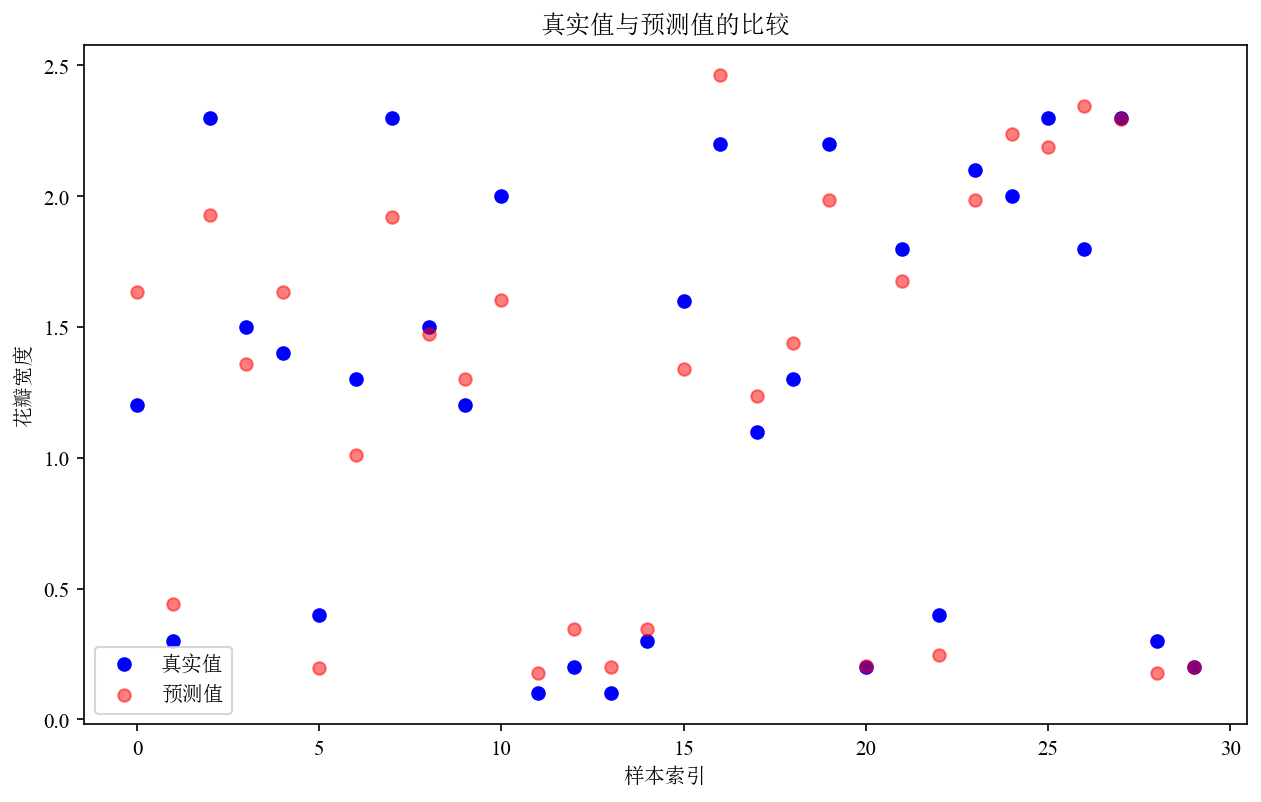

In [35]:
import xgboost as xgb

# 创建并训练XGBoost回归器
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'MSE误差: {mse}')

plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('样本索引')
plt.ylabel('花瓣宽度')
plt.title('真实值与预测值的比较')
plt.show()

## 分类任务 使用PCA

分类准确率: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



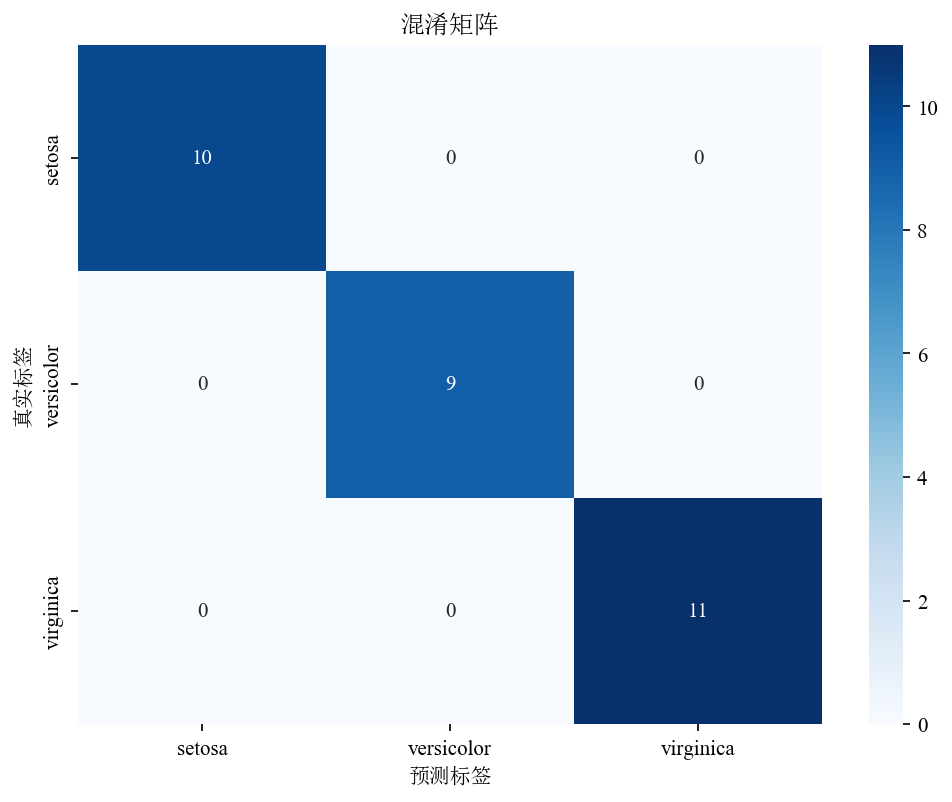

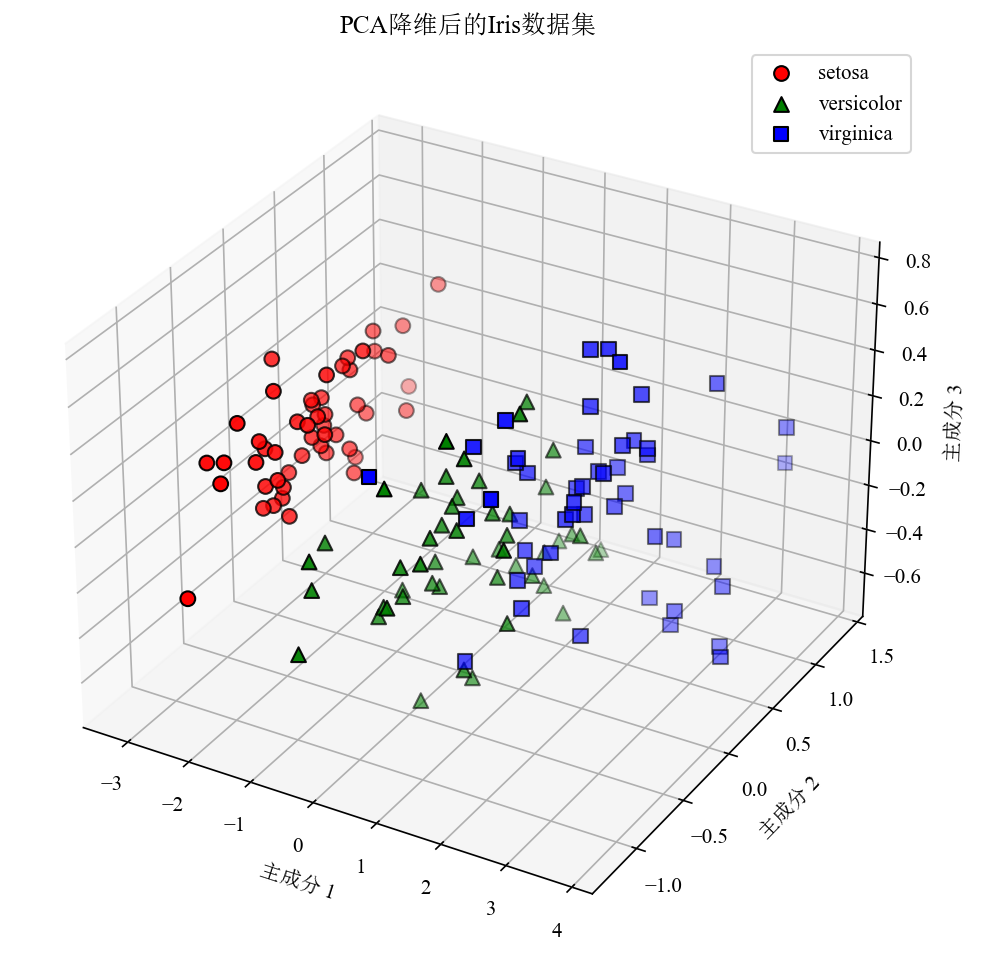

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

# 特征和目标变量
X = iris_dataset.data
y = iris_dataset.target

# 使用PCA降维到3个主成分
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 创建并训练KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f'分类准确率: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test, y_pred, target_names=iris_dataset.target_names))

# 绘制混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6),dpi=150)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

# 可视化降维后的数据（3D绘图）
fig = plt.figure(figsize=(10, 8),dpi=150)
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

for i, target_name in enumerate(iris_dataset.target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], c=colors[i], marker=markers[i], label=target_name, edgecolor='k', s=50)

ax.set_xlabel('主成分 1')
ax.set_ylabel('主成分 2')
ax.set_zlabel('主成分 3')
ax.set_title('PCA降维后的Iris数据集')
ax.legend()
plt.show()

不使用PCA

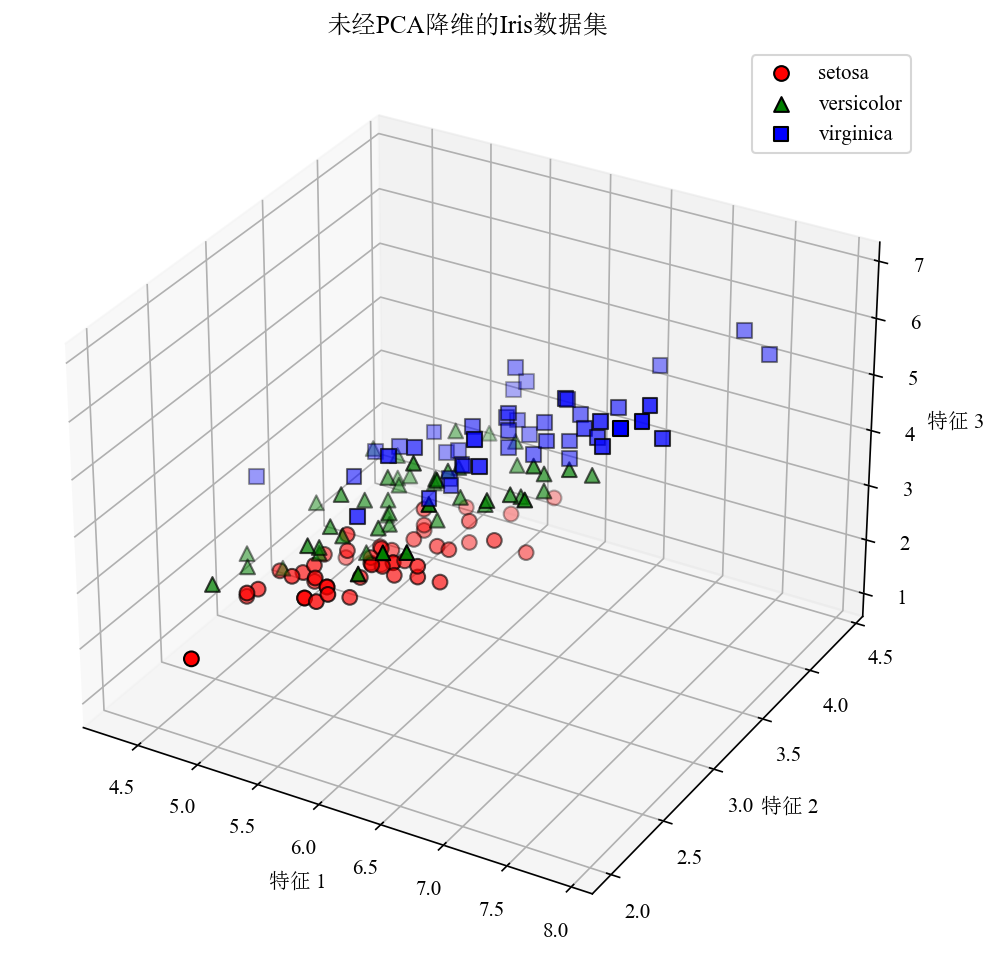

In [37]:
# 使用前三个特征作为数据
X_raw = iris_dataset.data[:, :3]

fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

for i, target_name in enumerate(iris_dataset.target_names):
    ax.scatter(X_raw[y == i, 0], X_raw[y == i, 1], X_raw[y == i, 2], c=colors[i], marker=markers[i], label=target_name, edgecolor='k', s=50)

ax.set_xlabel('特征 1')
ax.set_ylabel('特征 2')
ax.set_zlabel('特征 3')
ax.set_title('未经PCA降维的Iris数据集')
ax.legend()
plt.show()